In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

In [2]:
torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [3]:
from torchvision import datasets
data_path = "C:\\Users\\satya\\Downloads\\birds_vs_airplanes.pt"

In [4]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [6]:
len(cifar10)

50000

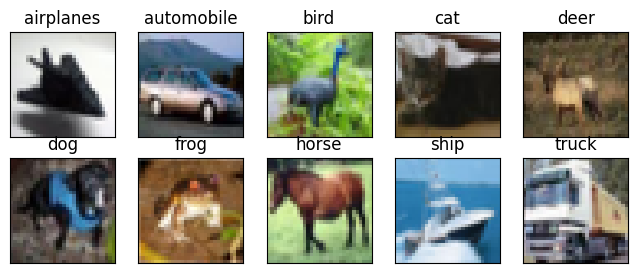

In [29]:
fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1+i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label==i)
    plt.imshow(img)
plt.show()

In [30]:
class_names = ["airplanes", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [31]:
img, label = cifar10[48000]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

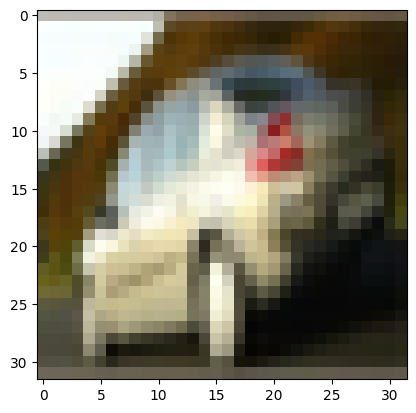

In [32]:
plt.imshow(img)
plt.show()

In [33]:
from torchvision import transforms

In [34]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [35]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [39]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download = False, transform = transforms.ToTensor())

In [109]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [111]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [113]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

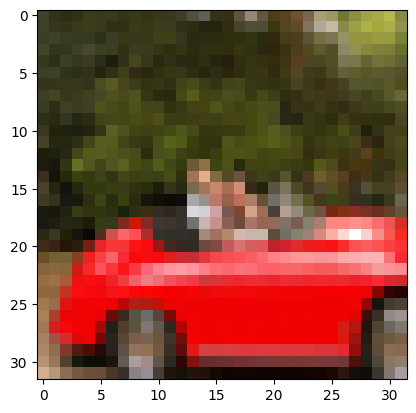

In [115]:
plt.imshow(img_t.permute(1,2,0))

In [117]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [118]:
imgs.view(3, -1).mean(dim = 1)

tensor([0.4914, 0.4822, 0.4465])

In [119]:
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [120]:
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [121]:
transformed_cisfar10 = datasets.CIFAR10(data_path, train=True, download = False, transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


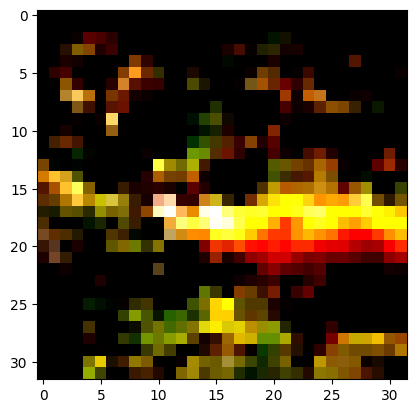

In [123]:
img_t, _ = transformed_cisfar10[98]
plt.imshow(img_t.permute(1,2,0))
plt.show()

In [124]:
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),(0.2470, 0.2435, 0.2616))
    ]))

In [125]:
label_map = {0: 0, 2: 1}
class_names = ["airplane", "bird"]
cifar2 = [(img, label_map[label])
         for img, label in cifar10
         if label in [0, 2]]
cifar2_val = [(img, label_map[label])
             for img, label in cifar10_val
             if label in [0, 2]]

In [126]:
import torch.nn as nn

In [127]:
n_out = 2
model = nn.Sequential(nn.Linear(3072, 512), nn.Tanh(), nn.Linear(512, n_out))

In [128]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [129]:
x = torch.tensor([1.0, 2.0, 3.0])

In [130]:
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [131]:
softmax = nn.Softmax(dim = 1)
x = torch.tensor([[1.0, 2.0, 3.0], [1.0, 2.0, 3.0]])

In [132]:
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [133]:
model = nn.Sequential(nn.Linear(3072, 512), nn.Tanh(), nn.Linear(512, 2), nn.Softmax(dim=1))

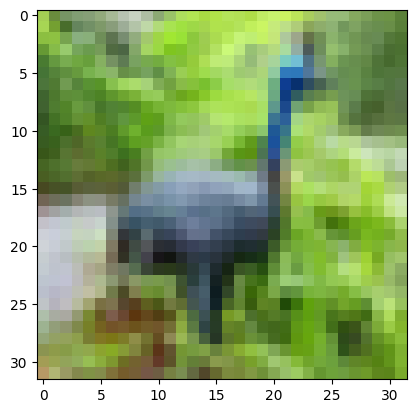

In [140]:
img, _ = cifar2[0]
img_t = to_tensor(img)
plt.imshow(img_t.permute(1,2,0))
plt.show()

In [148]:
img_batch = img_t.view(-1).unsqueeze(0)

In [150]:
out = model(img_batch)
out

tensor([[0.5141, 0.4859]], grad_fn=<SoftmaxBackward0>)

In [152]:
_, index = torch.max(out, dim = 1)
index

tensor([0])

In [154]:
model = nn.Sequential(nn.Linear(3072,512), nn.Tanh(), nn.Linear(512, 2), nn.LogSoftmax(dim = 1))

In [158]:
loss = nn.NLLLoss()

In [166]:
img, label = cifar2[0]
out = model(img_t.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.8230, grad_fn=<NllLossBackward0>)

In [172]:
import torch.optim as optim
model = nn.Sequential(nn.Linear(3072,512),
                     nn.Tanh(),
                     nn.Linear(512, 2),
                     nn.LogSoftmax(dim = 1))
learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for img, label in cifar2:
        img_t = to_tensor(img)
        out = model(img_t.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 1.226961
Epoch: 1, Loss: 1.557564
Epoch: 2, Loss: 1.759715
Epoch: 3, Loss: 2.141410
Epoch: 4, Loss: 2.603074
Epoch: 5, Loss: 2.991484
Epoch: 6, Loss: 3.168792
Epoch: 7, Loss: 3.986558
Epoch: 8, Loss: 3.685129
Epoch: 9, Loss: 4.293687
Epoch: 10, Loss: 5.068538
Epoch: 11, Loss: 5.140840
Epoch: 12, Loss: 5.718645
Epoch: 13, Loss: 6.202836
Epoch: 14, Loss: 6.860327
Epoch: 15, Loss: 6.741118
Epoch: 16, Loss: 9.565390
Epoch: 17, Loss: 5.651614
Epoch: 18, Loss: 3.557542
Epoch: 19, Loss: 5.754857
Epoch: 20, Loss: 4.761594
Epoch: 21, Loss: 6.391835
Epoch: 22, Loss: 9.670879
Epoch: 23, Loss: 9.697522
Epoch: 24, Loss: 9.259021
Epoch: 25, Loss: 11.106558
Epoch: 26, Loss: 10.113776
Epoch: 27, Loss: 5.715722
Epoch: 28, Loss: 3.678523
Epoch: 29, Loss: 13.118820
Epoch: 30, Loss: 10.984018
Epoch: 31, Loss: 3.351493
Epoch: 32, Loss: 9.231330
Epoch: 33, Loss: 9.175623
Epoch: 34, Loss: 3.751361
Epoch: 35, Loss: 3.553626
Epoch: 36, Loss: 6.805005
Epoch: 37, Loss: 9.081473
Epoch: 38, Loss: 4